## Gradesheet Maker Example

In [1]:
# import the main file
import gradesheetmaker as gsm

In [2]:
# load the fake gradesheet data
gs = gsm.Gradesheet('examples/fake_gradescope_data.csv')

# print inferred evaluations
gs.evaluations

['PS1', 'PS2', 'PS3', 'PS4', 'Bonus PS1', 'Bonus PS2', 'Final Exam']

In [3]:
# define your evaluation types
assignments = ['PS1', 'PS2', 'PS3', 'PS4']
bonus = ['Bonus PS1', 'Bonus PS2']
exams = ['Final Exam']
all_evaluations = assignments + bonus + exams

# give a grace period of 5 minutes to submit late to all assignments
gpp = gsm.GracePeriodLatePolicy(grace_period_min=5)
gs.apply_policy(gpp, assignments)

# set a sleep day policy where all students start with 5 sleep days where each late day consumes a sleep day, 
# until after sleep days are over whereupon every 3 days late will multiply evaluation grade by a factor of 0.7.
sdp = gsm.SleepDayLatePolicy(sleep_day_factor=0.7, sleep_day_factor_period_days=3, default_number_of_sleep_days=5)
gs.apply_policy(sdp, assignments)
gs.apply_policy(sdp, bonus)

# set a final grade assignment weighting where assignments are worth 60% and final is 40%, and
# where bonus assignments count as 1/2 of regular assignment
fgp = gsm.WeightedFinalGrade([0.15, 0.15, 0.15, 0.15, 0.075, 0.075, 0.4])
gs.apply_policy(fgp, all_evaluations)

# set a final letter based on certain grade cutoffs (above which they get the corresponding grade), 
# any grade that is below the last value will be 
flp = gsm.LetterGradePercentageCap(
    grade_cutoffs = [  97,  93,   90,   87,  83,   80,   77,  73,   70,   65,  60], 
    letters       = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
)
gs.apply_policy(flp)

# view the final master dataframe
gs.master

,Bonus PS1 grade (%),Bonus PS1 lateness (seconds),Bonus PS1 sleep days consumed,Bonus PS2 grade (%),Bonus PS2 lateness (seconds),Bonus PS2 sleep days consumed,Email,Final Exam grade (%),Final Exam lateness (seconds),First Name,...,PS3 grade (%),PS3 lateness (seconds),PS3 sleep days consumed,PS4 grade (%),PS4 lateness (seconds),PS4 sleep days consumed,Section,sleep days left,final grade (%),final letter
SID,,,,,,,,,,,,,,,,,,,,,
1803001,85.00,87603,2.0,80.000000,0,NaN,ebernal@example.com,90.0,298488,Emmeline,...,80.0,0,0,85.00,6421,1,Ph 002C-01,0,98.37500,A+
1018074,95.00,0,NaN,86.666667,0,NaN,tcain@example.com,80.0,118786,Teresa,...,90.0,320072,4,49.00,334782,1,Ph 002C-01,0,93.72500,A
1230801,24.01,542286,0.0,29.400000,294058,0.0,wfarmer@example.com,90.0,132771,Wesley,...,60.0,0,0,27.44,591134,0,Ph 002C-01,0,77.87175,C+
1401745,46.55,429957,0.0,86.666667,0,NaN,mgarza@example.com,90.0,0,Macie,...,80.0,0,0,70.00,0,0,Ph 002C-01,0,82.05725,B-
1089702,85.00,0,NaN,51.333333,50510,0.0,tguevara@example.com,80.0,238284,Thea,...,56.0,3100,0,85.00,0,0,Ph 002C-01,0,79.37500,C+
1449121,49.00,268023,0.0,100.000000,0,NaN,iguzman@example.com,90.0,0,Isabelle,...,100.0,0,0,85.00,350686,5,Ph 002C-01,0,100.00000,A+
1199537,90.00,0,NaN,49.000000,367641,0.0,mhayden@example.com,90.0,0,Mauricio,...,34.3,519481,2,90.00,0,0,Ph 002C-01,0,92.82000,A-
1198772,85.00,0,NaN,80.000000,0,NaN,churst@example.com,90.0,0,Colter,...,80.0,296486,4,75.00,0,0,Ph 002C-01,1,98.12500,A+
1057870,59.50,474087,3.0,29.726667,539175,0.0,smedina@example.com,100.0,167503,Stevie,...,90.0,0,0,65.00,127282,2,Ph 002C-01,0,94.19200,A


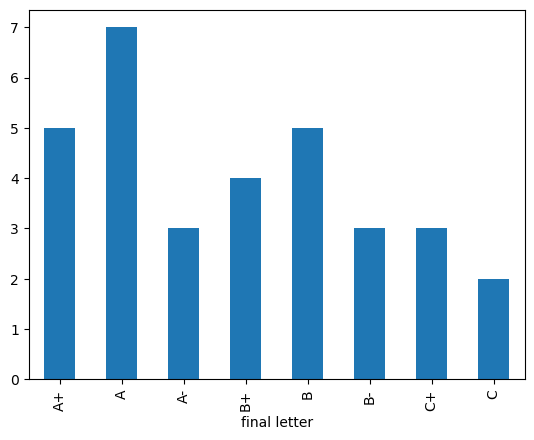

In [4]:
# display the grade statistics
gs.display_dist('final letter', order=['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F'])

In [5]:
# export data to excel sheet
gs.to_excel('gradesheet.xlsx')

# export data to csv
gs.to_csv('gradesheet.csv')